<a href="https://colab.research.google.com/github/khu-bigphys-2020/lectures-bigphys/blob/master/Lecture/04_Function_Fitting" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function fitting
여기에서는 Deep Learning을 하기 전 단계로, 노이즈가 포함된 간단한 data를 생성하고, 이 데이터로부터 본래의 parameter를 찾아내는 과정을 연습합니다.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import *

데이터를 생성합니다. numpy를 사용하면 더 빠르고 효율적으로 만들 수 있지만, 여기에서는 pure python을 기반으로 해 제작해봅니다. 

In [4]:
x = []
y = []
for i in range(100):
  x0 = random.uniform(-10, 50)
  y0 = -12.345*x0 + 1256.7 + random.gauss(0, 50)
  x.append(x0)
  y.append(y0)
print(len(x), len(y))

100 100


데이터 자체를 눈으로 보면서 그 성질을 확인 해 보는 것은 데이터 분석가로써 먼저 보는 것이 좋습니다. 최종 결과에 대해 편항된 결과를 얻는 실수를 하지 않기 위해서는 실제 데이터를 직접 보지 않는 blind analysis를 하는 것이 권장되지만, 그렇다고 데이터 자체가 어떻게 생겼는지에 대해 무지한 상태로 접근하는 것은 잘못된 결론을 얻을 가능성이 많았습니다. 

어떤 방식으로 데이터를 분석해 나갈지는 데이터와 해결해야 하는 문제의 성격에 따라 크게 달라집니다. 예를 들어 여기에서는 x, y라는 변수가 있고 이들간의 관계식을 얻으려는 목적이라고 해 봅시다. 먼저 x-y scatter plot을 보면서 관계성을 눈으로 확인했고, 가능한 variable들을 고안해 보는 시도를 해 보았다고 합시다. (x/y) 비율 값을 시도 해 본 예시인데, 어떤 변수들을 사용하고 어떤 조합을 할지는 데이터에 따라 달라집니다. 

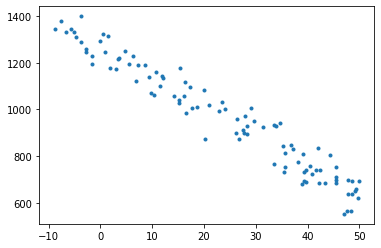

In [5]:
plt.plot(x, y, '.')

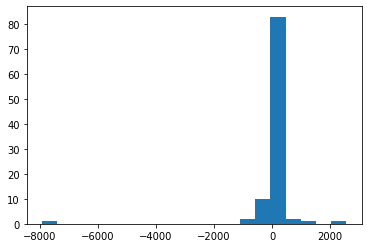

In [6]:
r = [y[i]/x[i] for i in range(len(y))]
plt.hist(r, bins=20);

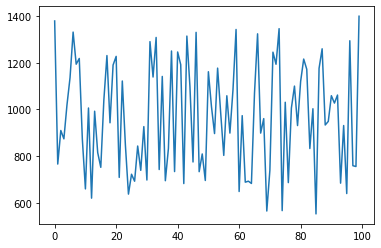

In [7]:
plt.plot(y);

## Fitting
데이터에서 y값이 x에 대해 어떤 함수 관계를 갖는지 알고 싶다고 합시다. 

머신러닝으로 바로 접근하는 것이 최근 많이 보이겠지만, 해당 문제에 대해 이론적인 모델이 이미 잘 알려져 있고 이들이 잘 맞는지 평가하는 것이 목적이라면 function fitting이 적합한 접근 방법에 가깝습니다. 
예를 들어 포탄의 궤도를 추적하는 데 뉴턴 방적식, y=1/2gt^2 + v0t + y0를 놓고 데이터를 잘 설명하는 parameter를 찾는 것이 데이터의 물리학적 의미를 파악하는 데 직접적인 도움이 될 것입니다.

여기에서는 y=ax+b 가 "이론" 모델이라고 생각하시고 진행하면 됩니다.

In [8]:
def f(x, a=-13.3, b=1250):
  return a*x + b

첫 번째 시도에서는 눈으로 a, b 파라미터를 조정하는 작업을 거쳤습니다. 강의 시간중에 아무 값이나 넣은 다음 눈으로 보고 y절편값을 바꾸거나 기울기를 바꾸어 가는 방식으로 가장 비슷해 보이는 선을 찾아가는 과정을 시도했습니다. 이 때 판단의 기준점을 "눈으로 판단하기"로 했을 때 문제가 많습니다만, 일단 어느 정도까지는 답을 찾아보았습니다.

약간 더 실제 상황에 가깝게 가기 위해 판단 기준을 root-mean-square로 바꾸었습니다. 

딥러닝에서는 판단 기준, RMS가 Loss function이고, 어떻게 최적점을 찾을까 부분이 optimizer에 대응됩니다.

63.738968791748114


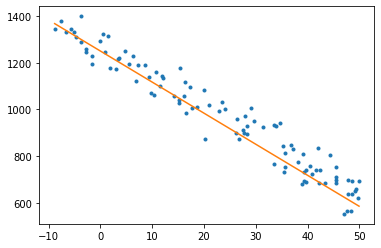

In [9]:
x0, x1 = min(x), max(x)
plt.plot(x, y, '.');
plt.plot([x0,x1], [f(x0), f(x1)], '-');
reses = [(y[i]-f(x[i]))**2 for i in range(len(y))]
res = sqrt(sum(reses)/len(reses))
print(res)

눈으로 최적점을 찾는 것은 무리가 있습니다. 첫 시도로는 random search를 해 보았습니다. 당연 잘 안 됩니다.

55.955072382389794 -12.299948109591647 1243.3305709125227


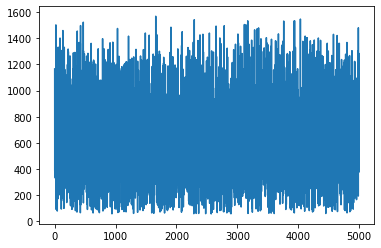

In [50]:
bestLoss = 1e9
bestA, bestB = 0, 0
dt = 0.01
lossHistory = []
aHistory, bHistory = [], []
a, b = -12, 100
for i in range(5000):
  a, b = random.uniform(-20, 20), random.uniform(0, 2000)
  reses = [(y[i]-f(x[i],a,b))**2 for i in range(len(y))]
  loss = sqrt(sum(reses)/len(reses))
  lossHistory.append(loss)
  aHistory.append(a)
  bHistory.append(b)
  if loss < bestLoss:
    bestA, bestB = a, b
    bestLoss = loss
print(bestLoss, bestA, bestB)

plt.plot(lossHistory);

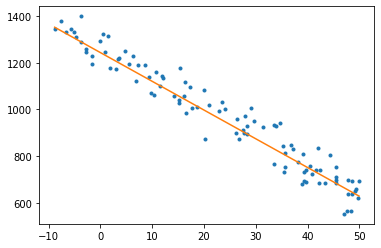

In [51]:
x0, x1 = min(x), max(x)
plt.plot(x, y, '.');
plt.plot([x0,x1], [f(x0, bestA, bestB), f(x1, bestA, bestB)], '-');

더 나은 방법은 이전 강의에서 이야기 했듯이 gradient를 계산해 minimum을 향해 옮겨가는 것입니다. 전기장에서 전하의 움직임이나 중력장에서 입자의 움직임을 보시면 됩니다.

여기에서 dt 와 반복 횟수 range(5000)부분을 최적화 해야 하는데 이 값을 너무 크게 잡으면 converge하지 않고 oscillate하거나 diverge해버리게 되고, 반대로 너무 작으면 iteration을 너무 오래 반복해야 하는 문제가 생깁니다.

54.28602380367538 -12.322695319294226 1255.0405428315585


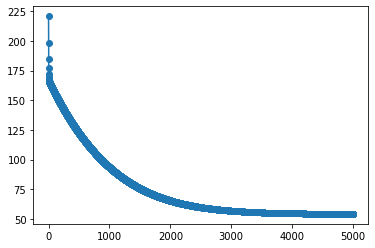

In [62]:
bestLoss = 1e9
bestA, bestB = 0, 0
dt = 0.001
lossHistory = []
aHistory, bHistory = [], []
a, b = -12, 1000
for i in range(5000):
  aGrad = [2*x[i]*(y[i]-f(x[i], a, b)) for i in range(len(y))]
  bGrad = [2*(y[i]-f(x[i], a, b)) for i in range(len(y))]
  a += sum(aGrad)/len(aGrad)*dt
  b += sum(bGrad)/len(bGrad)*dt
  #print(a,b)
  
  reses = [(y[i]-f(x[i],a,b))**2 for i in range(len(y))]
  loss = sqrt(sum(reses)/len(reses))
  lossHistory.append(loss)
  aHistory.append(a)
  bHistory.append(b)
  if loss < bestLoss:
    bestA, bestB = a, b
    bestLoss = loss
print(bestLoss, bestA, bestB)
plt.plot(lossHistory, '-o');

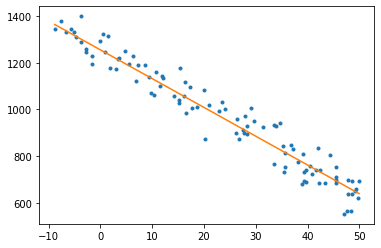

In [63]:
x0, x1 = min(x), max(x)
plt.plot(x, y, '.');
plt.plot([x0,x1], [f(x0, bestA, bestB), f(x1, bestA, bestB)], '-');

# 숙제

여기에서는 y=ax+b를 풀었습니다. 

함수를 sin(kx)로 놓고 데이터를 만든 뒤 function fitting을 해 보세요.